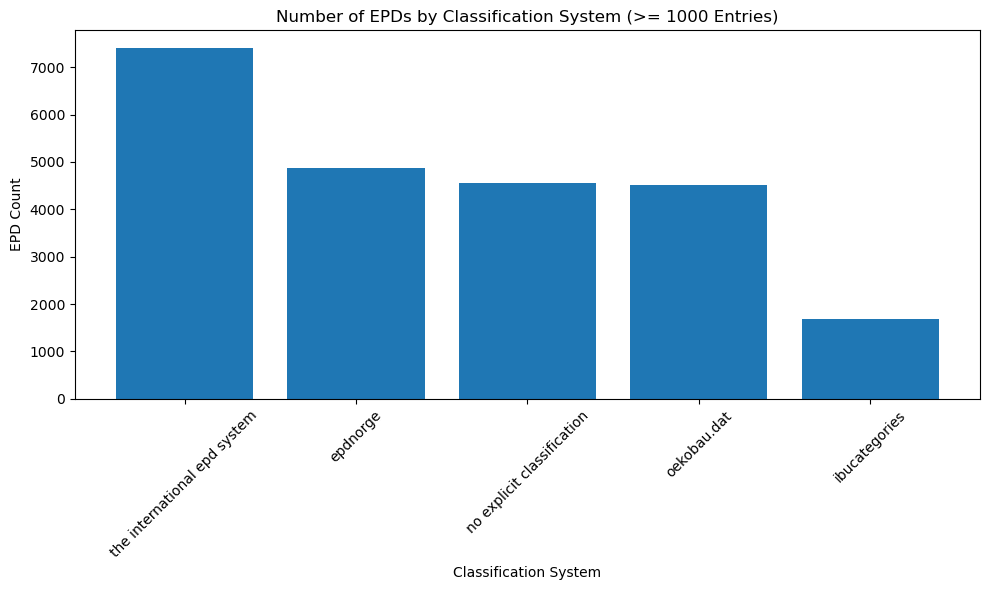

,classification_system,epd_count
0,the international epd system,7406
1,epdnorge,4872
2,no explicit classification,4551
3,oekobau.dat,4520
4,ibucategories,1693


In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Define the correct path to your EPD database
DB_PATH = "../data/pipeline2/sql/epd_database.sqlite"

# 1. Connect to the database
conn = sqlite3.connect(DB_PATH)
cursor = conn.cursor()

# 2. SQL query:
#    - Use COALESCE to include entries without a classification system by substituting 'no classification'
#    - Convert classification_system values to lowercase for a case-insensitive grouping
#    - Remove any classification with under 1000 entries using the HAVING clause
#    - Order the results by epd_count in descending order
query = """
    SELECT 
        COALESCE(lower(m.classification_system), 'no explicit classification') AS classification_system,
        COUNT(*) AS epd_count
    FROM epd_documents d
    JOIN epd_metadata m ON d.uuid = m.uuid
    GROUP BY COALESCE(lower(m.classification_system), 'no explicit classification')
    HAVING COUNT(*) >= 1000
    ORDER BY epd_count DESC
"""

cursor.execute(query)
rows = cursor.fetchall()

# 3. Load the results into a pandas DataFrame
df = pd.DataFrame(rows, columns=["classification_system", "epd_count"])

# Always close the connection when done
conn.close()

# 4. (Optional) Ensure DataFrame is sorted by epd_count in descending order for plotting
df = df.sort_values(by="epd_count", ascending=False)

# 5. Create a bar plot with the classification systems ordered from left (highest count) to right (lowest count)
plt.figure(figsize=(10,6))
plt.bar(df["classification_system"], df["epd_count"])
plt.title("Number of EPDs by Classification System (>= 1000 Entries)")
plt.xlabel("Classification System")
plt.ylabel("EPD Count")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.tight_layout()       # Adjust layout to ensure everything fits well
plt.show()

# Display the DataFrame to verify the data
df


In [5]:
print(df)

          classification_system  epd_count
0  the international epd system       7406
1                      epdnorge       4872
2             no classification       4551
3                   oekobau.dat       4520
4                 ibucategories       1693
